In [22]:
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline


# call this script from the directory which has both the *label*.png and *predlabels*.png files

dir_full_path = "/home/peteflo/tensorflow-deeplab-resnet/output_all_sixobject_networks_hz/"

with open(os.path.join(dir_full_path,"summary.txt")) as f:
        content = f.readlines()

content = [x.strip() for x in content]

# x axis is hz
x_axis = [0.03, 0.3, 3.0, 30.0]

ious_by_label = {}
std_by_label = {}

for i in content:
    split = i.split()
    if len(split) == 1:
        trial_name = i
        print "trial name", i
        continue

    label_number = split[0]
    iou          = split[1]
    std          = split[2]
    object_name  = split[3]

    if object_name not in ious_by_label.keys():
        ious_by_label[object_name] = []
        std_by_label[object_name] = []

    ious_by_label[object_name].append(float(iou))
    std_by_label[object_name].append(float(std))

trial name predlabels_hz_sixobjects_mixed_train_36_scenes_00_03hz.png
trial name predlabels_hz_sixobjects_mixed_train_36_scenes_00_30hz.png
trial name predlabels_hz_sixobjects_mixed_train_36_scenes_03_00hz.png
trial name predlabels_hz_sixobjects_mixed_train_36_scenes_30_00hz.png


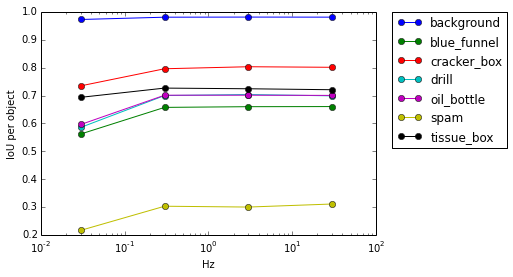

In [24]:
for object_name, val in sorted(ious_by_label.iteritems()):
    plt.semilogx(x_axis, val, 'o-', label=object_name)
    #plt.errorbar(x_axis, val, std_by_label[object_name])

plt.xlabel("Hz")
plt.ylabel("IoU per object")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()